In [ ]:
# Magic home
%cd /home/benjamin/git/swiss-river-network/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from swissrivernetwork.gbr25.graph_exporter import plot_graph
from swissrivernetwork.benchmark.train_isolated_station import read_graph, read_stations

# nicer labels for plots
label = dict()
label['lstm'] = 'LSTM'
label['graphlet'] = 'Graphlet'
label['lstm_embedding'] = 'LSTM-E'
label['stgnn'] = 'ST-GNN'
label['swiss-1990'] = 'Swiss-1990'
label['swiss-2010'] = 'Swiss-2010'
label['zurich'] = 'Zurich'
    
# Variables
GRAPH_NAMES = ['swiss-1990', 'swiss-2010', 'zurich']
METHODS = ['lstm', 'graphlet', 'lstm_embedding', 'stgnn']
EXPORT_PGF = False
#FIGURE_SIZE = (10, 4)
FIGURE_SIZE = (3, 3)
DPI = 300


/home/benjamin/git/swiss-river-network


In [2]:
# Setup helper

def show(filename, export_png=False):
    if EXPORT_PGF or export_png:
        plt.savefig(f"swissrivernetwork/journal/visualize_results/figures/{filename}", dpi=DPI, bbox_inches='tight')
    else:
        plt.show()


# Setup PGF:
if EXPORT_PGF:
    mpl.use("pgf")

    # Optional: Configure fonts to match LaTeX document
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",  # or xelatex, lualatex
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    })
else:
    plt.rcParams['font.family'] = 'serif'

# Initialize nicer labels:
methods_labels = [label[m] for m in METHODS]



min_color 0.40212098 max_color 1.428378
margin ratio: (delta_x):  280089 delta y: 159578


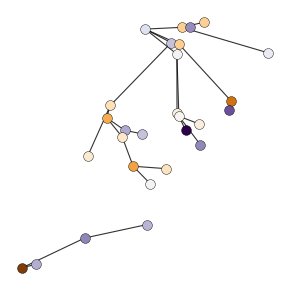

min_color 0.37987342 max_color 1.7159615
margin ratio: (delta_x):  343811 delta y: 190540


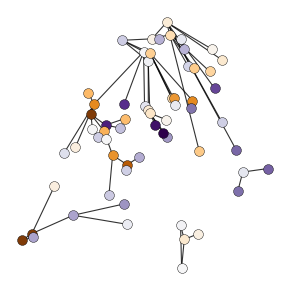

min_color 0.61110187 max_color 1.1644486
margin ratio: (delta_x):  32855 delta y: 33700


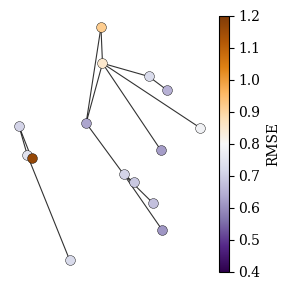

In [3]:
# Figure 1: LSTM Absolute Values

# Load data
method = 'lstm'
dfs = [pd.read_csv(f'swissrivernetwork/journal/dump/test_results/{g}_{method}.csv') for g in GRAPH_NAMES]
baseline_dfs = dfs # copy for later use

# Init plot
#fig, axes = plt.subplots(1, 3, figsize=FIGURE_SIZE)  # 1 rows, 3 columns
#axes = axes.flatten()  # Flatten to 1D array for easy looping

for index,_ in enumerate(GRAPH_NAMES):    

    # Setup Graph
    stations = read_stations(GRAPH_NAMES[index])
    g,e = read_graph(GRAPH_NAMES[index])
    
    # Compute Colors
    information = dict()
    color = dict()
    for j,station in enumerate(stations):
        information[station] = f'j:{j}'
        color[station] = dfs[index]['RMSE'].iloc[j]

    # plot graph
    #ax = axes[index]  
    #plt.sca(ax)  
    plt.figure(figsize=FIGURE_SIZE)
    plot_graph(g, e, information, color, vmin=0.4, vmax=1.2, cmap='PuOr_r', colorbarlabel='RMSE', skipcolorbar=(index != 2))
    #plt.gca().axis('off')
    plt.tight_layout()
    show(f'figure_lstm_absolute_{GRAPH_NAMES[index]}.pgf')
    plt.close()

    # fix subplot:
    #ax.axis('off')


#plt.suptitle('Absolute Prediction Error (RMSE) – LSTM Baseline')
#plt.tight_layout(pad=20.0)
#show('figure_lstm_absolute.pgf')

min_color -0.11739530000000009 max_color 0.07354749999999999
margin ratio: (delta_x):  280089 delta y: 159578


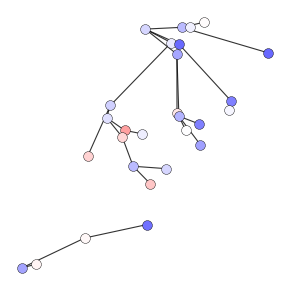

min_color -0.5295326 max_color 0.14678860000000005
margin ratio: (delta_x):  343811 delta y: 190540


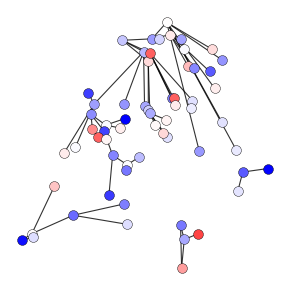

min_color -0.08033685000000002 max_color 0.040756450000000055
margin ratio: (delta_x):  32855 delta y: 33700


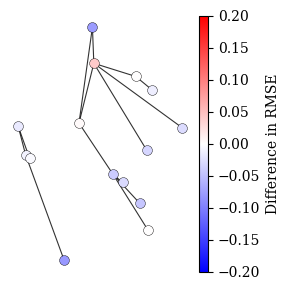

min_color -0.12579715000000002 max_color 0.22052479999999997
margin ratio: (delta_x):  280089 delta y: 159578


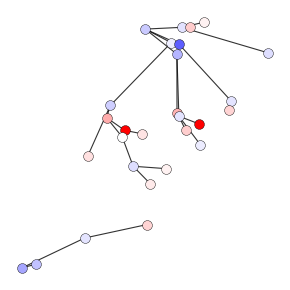

min_color -0.20150219999999996 max_color 0.30663930000000006
margin ratio: (delta_x):  343811 delta y: 190540


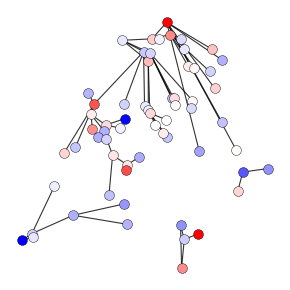

min_color -0.31470790000000004 max_color 0.05101887000000005
margin ratio: (delta_x):  32855 delta y: 33700


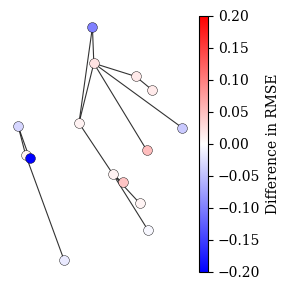

min_color -0.12339705000000001 max_color 0.1245042500000001
margin ratio: (delta_x):  280089 delta y: 159578


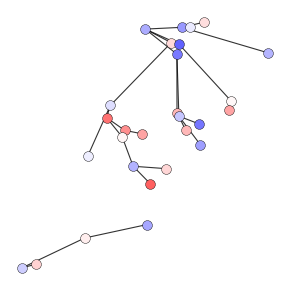

min_color -0.43543413 max_color 0.20316823000000006
margin ratio: (delta_x):  343811 delta y: 190540


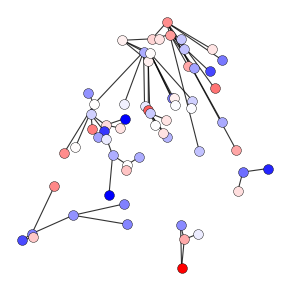

min_color -0.26786045 max_color 0.11810436999999996
margin ratio: (delta_x):  32855 delta y: 33700


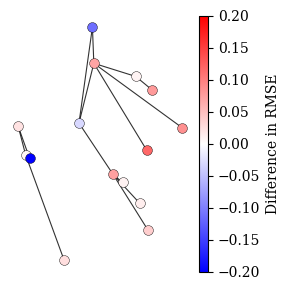

In [4]:
# Figure 2-4: Differences to Baseline

def plot_baseline_reduction(method):

    # Load data
    dfs = [pd.read_csv(f'swissrivernetwork/journal/dump/test_results/{g}_{method}.csv') for g in GRAPH_NAMES]

    # Init plot
    #fig, axes = plt.subplots(1, 3, figsize=FIGURE_SIZE)  # 1 rows, 3 columns
    #axes = axes.flatten()  # Flatten to 1D array for easy looping

    for index,_ in enumerate(GRAPH_NAMES):    

        # Setup Graph
        stations = read_stations(GRAPH_NAMES[index])
        g,e = read_graph(GRAPH_NAMES[index])
        
        # Compute Colors
        information = dict()
        color = dict()
        for j,station in enumerate(stations):
            information[station] = f'j:{j}'
            color[station] = dfs[index]['RMSE'].iloc[j]-baseline_dfs[index]['RMSE'].iloc[j]

        # plot graph
        #ax = axes[index]  
        #plt.sca(ax)  
        plt.figure(figsize=FIGURE_SIZE)
        plot_graph(g, e, information, color, vmin=-0.2, vmax=0.2, cmap='bwr', colorbarlabel='Difference in RMSE', skipcolorbar=(index != 2))

        plt.tight_layout()
        show(f'figure_{method}_difference_{GRAPH_NAMES[index]}.pgf')
        plt.close()

        # fix subplot:
        #ax.axis('off')


    #plt.suptitle(f'Difference in RMSE Relative to Baseline – {label[method]}')
    #plt.tight_layout(pad=20.0)
    #show(f'figure_{method}_difference.pgf')

for i in range(1, 4):
    plot_baseline_reduction(METHODS[i])

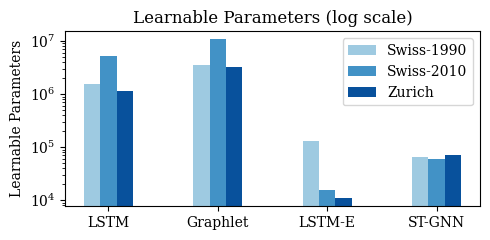

In [5]:
# Figure 5: learnable parameters

df_parameter = pd.read_csv('swissrivernetwork/journal/visualize_results/learnable_parameters.csv')
df_parameter.loc[1, ['swiss-1990', 'swiss-2010', 'zurich']] += df_parameter.loc[0, ['swiss-1990', 'swiss-2010', 'zurich']] # real parameter count

#print(df_parameter)
df = df_parameter

# Set position of bar on X axis
bar_width = 0.15
x = np.arange(len(df['Method']))

colors = ['#9ecae1', '#4292c6', '#08519c']

# Create the plot
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.bar(x - bar_width, df['swiss-1990'], width=bar_width, label=label['swiss-1990'], color=colors[0])
ax.bar(x, df['swiss-2010'], width=bar_width, label=label['swiss-2010'], color=colors[1])
ax.bar(x + bar_width, df['zurich'], width=bar_width, label=label['zurich'], color=colors[2])

# Log scale for y-axis
ax.set_yscale('log')

# Add labels and title
#ax.set_xlabel('Method')
ax.set_ylabel('Learnable Parameters')
ax.set_title('Learnable Parameters (log scale)')
ax.set_xticks(x)
ax.set_xticklabels([label[m.lower()] for m in df['Method']])
ax.legend()

# Show the plot
plt.tight_layout()
show(f'figure_learnable_parameters.pgf')

created 247345 edges and 258191 nodes. discarded 5071 dublicates. discarded 11064 self loops.
start pruning...
pruning done.
min_color #44cad6 max_color #44cad6
margin ratio: (delta_x):  343811 delta y: 190540
Swiss-2010
min_color #a5e2c5 max_color #a5e2c5
Swiss-1990
min_color #08306b max_color #08306b
Zurich


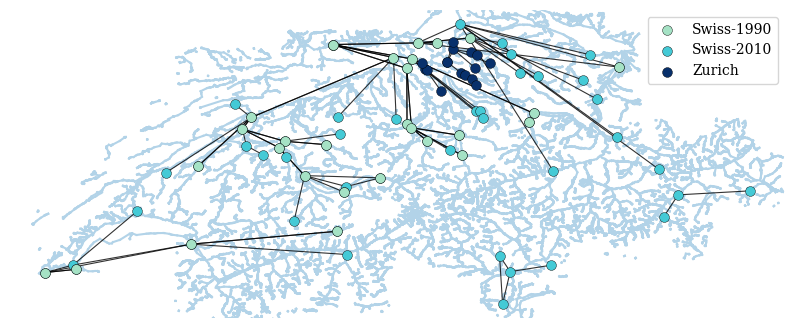

In [6]:
# Script to plot the datasets from a User view:

from swissrivernetwork.graph_preprocessing.gewaessernetz_processor import *

# (Same colors as Learnable Parameters:)
# Z-Order: (Swiss-2010, Swiss-1990, Zurich)
# or shapes? (1990 and 2010), (2010 only), (Zurich)
# square, circle, star

plt.figure(figsize=(10, 4))

# Preapre plot and add some river network:
gwn = GewaesserNetz('../data/gewaesser/gewaessernetz/gewaessernetz', types=['Bach', 'Bachachs', 'Bach_U', 'Fluss', 'See', 'Kanal', 'Fluss_U'])
gwn.read()
nodes, edges = gwn.edges()

print('start pruning...')
removed_edges = 1
while(removed_edges > 0):
    edges, removed_edges = prune_one_degree_edges(edges)
    nodes = prune_zero_degree_nodes(nodes)
print('pruning done.')

# remove stations
for e in edges:
    e.station = None

plot_edges(edges)
#for e in edges:




#colors = ['#4292c6', '#9ecae1', '#08519c'] # swapped
#colors = ['r', 'g', 'b']
colors = ['#44cad6', '#a5e2c5', '#08306b']

for index,graph_name in enumerate(['swiss-2010', 'swiss-1990', 'zurich']): # swapped

    # Setup Graph
    stations = read_stations(graph_name)
    g,e = read_graph(graph_name)
    
    # Compute Colors
    information = dict()
    color = dict()
    for j,station in enumerate(stations):
        information[station] = f'j:{j}'
        color[station] = colors[index]

    # plot graph
    #ax = axes[index]  
    #plt.sca(ax)  
    ax = plt.gca()
    plot_graph(g, e, information, color, skipcolorbar=True, skipmargin=(index != 0), use_static_color=True)

    # add label:
    print(label[graph_name])
    ax.scatter(g[0,0], g[0,1], color=colors[index], s=50, edgecolors='k', zorder=3, linewidth=0.3, label=label[graph_name])


# QUICKFIX
# Get current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Swap positions — example: swap index 0 and 1
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]

plt.legend(handles, labels)
show('dataset_overview.png', export_png=True)

    